# Import Libraries

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# import ydata_profiling as yp
import re
from fuzzywuzzy import process
import fuzzywuzzy
from rapidfuzz import process, fuzz

import ast
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.impute import KNNImputer as knn

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

warnings.simplefilter("ignore")

# Explore Data

In [ ]:
data = pd.read_csv(r"C:\Users\ahmed\Desktop\cat-datathon-1-0\train_version_2.csv")
Test = pd.read_csv(r"C:\Users\ahmed\Desktop\cat-datathon-1-0\Test\test.csv")

In [ ]:
col_map = {
    'Person Description': 'personDescription',
    'Customer Order': 'customerOrder',
    'Additional Features in market': 'additionalFeaturesInMarket',
    'Promotion Name': 'promotionName',
    'Store Kind': 'storeKind',
    'Store Sales': 'storeSales',
    'Store Cost': 'storeCost',
    'Gross Weight': 'grossWeight',
    'Net Weight': 'netWeight',
    'Package Weight': 'packageWeight',
    'Is Recyclable?': 'isRecyclable?',
    'Yearly Income': 'min.YearlyIncome',
    'Store Area': 'totalArea',
    'Grocery Area': 'groceryArea',
    'Frozen Area': 'frozenArea',
    'Meat Area': 'meatArea',
    'customer_city': 'customer_city',
    'customer_state': 'customer_state',
    'customer_lat': 'customer_lat',
    'customer_lng': 'customer_lng',
    'seller_city': 'seller_city',
    'seller_state': 'seller_state',
    'seller_lat': 'seller_lat',
    'seller_lng': 'seller_lng',
    'review_score': 'review_score'
}

Test = Test.rename(columns=col_map)


In [ ]:
data.sample(5)

,personDescription,min.YearlyIncome,customerOrder,grossWeight,netWeight,isRecyclable?,additionalFeaturesInMarket,promotionName,storeKind,storeSales,storeCost,groceryArea,frozenArea,meatArea,cost,customer_city,customer_state,customer_lat,customer_lng,seller_city,seller_state,seller_lat,seller_lng,review_score,totalArea,packageWeight
18396,education: partial high school working as manu...,10K+,"Canned Soup from Canned Foods department, Orde...",15,14,recyclable,"['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Price Slashers,deluxe,5.25 Millions,1.68 Millions,1736.03,503.07,335.38,282.9953,americana,SP,-22.721365005132203,measure: -47.321328748365374,GAM4,df,-16.02294658397918,-48.05071815778448,1.0,2574.35,1
19920,"Married Female with three children, education:...",€25K+,"Canned Tuna from Canned Foods department, Orde...",32,29,no,"['Ready Food', 'Bar For Salad', 'Coffee Bar', ...",Sale : Double Down,Deluxe,8.31 M,2.7423 M,2055.29,654.13,NaN,measure: 500.7202,piracicaba,Sp,-22.67126597723474,-47.69675782988044,echapora,SP,-22.42925217631197,-50.20413759688468,5.0,3145.51,3
25461,"Married Male with three children, education: p...",10K+,"Plastic Products from Household department, Or...",29,26,Data Missing,"['Ready Food', 'Coffee Bar', 'Video Store', 'B...",I Cant Believe It Sale,Deluxe,7.8 M,3.276 M,1734.5,503.07,335.38,measure: 363.3281,sao paulu,Sp,-23.599634741329545,-46.6603591434878,baru3ri,SP,-23.5105249691296,-46.86104614786531,5.0,2572.86,3
30216,"Married Male with four children, education: hi...",$30K+,"Side Dishes from Deli department, Ordered Bran...",25,22,no,['Coffee Bar'],Best Savings,Small Grocery,1.36 M,0.4624 M,1393.53,534.29,356.19,765.2536,_rio de janeiro,RJ,-22.88944883819032,-43.28518885053956,sorocab4,SP,-23.489741556206333,-47.509921178602326,measure: 1.0,2284.5,3
34478,"Married Female with two children, education: p...",$10K+,"Hot Beverages from Beverages department, Order...",9,6,yes,"['Ready Food', 'Florist', 'Coffee Bar', 'Video...",Two Day Sale,NaN,6.8Ms,2.176 Millions,1423.93,465.54,311.04,663.5824,barueri,sp,data: -23.50682727840872,data: -46.87255898428397,sao paulo,$P,-23.53435725950717,-46.64935629739165,4.0,2198.96,3


In [ ]:
df = data.copy()

In [ ]:
print(df.size)
print(df.shape)

1069770
(41145, 26)


In [ ]:
# df.info()

In [ ]:
df.isna().sum() / len(df) * 100.0

personDescription             0
min.YearlyIncome              0
customerOrder                 0
grossWeight                   0
netWeight                     0
isRecyclable?                 0
additionalFeaturesInMarket   11
promotionName                15
storeKind                    15
storeSales                    0
storeCost                     0
groceryArea                   7
frozenArea                    7
meatArea                      7
cost                          0
customer_city                 0
customer_state                0
customer_lat                  0
customer_lng                  0
seller_city                   1
seller_state                  1
seller_lat                    1
seller_lng                    1
review_score                  1
totalArea                     7
packageWeight                 0
dtype: float64

In [ ]:
# df.describe().T

In [ ]:
# duplicated_rows = df[df.duplicated(keep=False)]
# duplicated_rows_sorted = duplicated_rows.sort_values(by=df.columns.tolist())
df.duplicated().sum()

np.int64(764)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# profile = yp.ProfileReport(df, title="My Data")
# profile.to_notebook_iframe()

# Clean Data

In [ ]:
df.columns

Index(['personDescription', 'min.YearlyIncome', 'customerOrder', 'grossWeight',
       'netWeight', 'isRecyclable?', 'additionalFeaturesInMarket',
       'promotionName', 'storeKind', 'storeSales', 'storeCost', 'groceryArea',
       'frozenArea', 'meatArea', 'cost', 'customer_city', 'customer_state',
       'customer_lat', 'customer_lng', 'seller_city', 'seller_state',
       'seller_lat', 'seller_lng', 'review_score', 'totalArea',
       'packageWeight'],
      dtype='object')

In [ ]:
Test.columns

Index(['ID', 'personDescription', 'customerOrder',
       'additionalFeaturesInMarket', 'promotionName', 'storeKind',
       'storeSales', 'storeCost', 'grossWeight', 'netWeight', 'packageWeight',
       'isRecyclable?', 'min.YearlyIncome', 'totalArea', 'groceryArea',
       'frozenArea', 'meatArea', 'customer_city', 'customer_state',
       'customer_lat', 'customer_lng', 'seller_city', 'seller_state',
       'seller_lat', 'seller_lng', 'review_score'],
      dtype='object')

In [ ]:
Test.isna().sum()

ID                               0
personDescription               15
customerOrder                   18
additionalFeaturesInMarket      19
promotionName                   34
storeKind                       49
storeSales                      13
storeCost                       23
grossWeight                    761
netWeight                      825
packageWeight                   15
isRecyclable?                   12
min.YearlyIncome                12
totalArea                     1007
groceryArea                   1060
frozenArea                     978
meatArea                       996
customer_city                   18
customer_state                  13
customer_lat                    56
customer_lng                    70
seller_city                    164
seller_state                   159
seller_lat                     192
seller_lng                     179
review_score                   136
dtype: int64

## `storeSales` an `storeCost` column ✔️

###### info

- **Store Cost** – Initial investment or cost to establish the store  
- **Store Sales** – Total sales revenue generated by the store since opening  

**ملاحظة:**  
Using `storeCost` to replace `promoCategory` is statistically acceptable (because it has a correlation), but it is **not directly causal**.


In [ ]:
df['storeSales'].isna().sum() # 46
df['storeCost'].isna().sum()

np.int64(31)

In [ ]:
import pandas as pd
import numpy as np

cols_to_clean = ['storeSales', 'storeCost']

for col in cols_to_clean:
    df[col] = df[col].astype(str).str.lower()
    df[col] = df[col].str.replace(r'[\(\)]', '', regex=True)
    millions_mask = df[col].str.contains(r'millions?\.?', regex=True, na=False)
    df[col] = df[col].str.replace(r'millions?\.?', '', regex=True)
    df[col] = df[col].str.replace(r'illion', '', regex=True)
    df[col] = df[col].str.replace(r'ms?', '', regex=True)
    df[col] = df[col].str.replace(r'm\b', '', regex=True)
    df[col] = df[col].str.replace(r'[^0-9\.\-]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col] * 1_000_000



df.loc[df['storeSales'] < 0, 'storeSales'] = np.nan
df.loc[df['storeCost'] < 0, 'storeCost'] = np.nan

pd.set_option('display.float_format', '{:,.0f}'.format)


In [ ]:
# df['storeSales'].isna().sum() # 46
df['storeCost'].isna().sum()

np.int64(114)

In [ ]:
df[['storeSales','storeCost']].describe()

,storeSales,storeCost
count,"40,260","40,267"
mean,"6,454,436","2,615,941"
std,"3,437,182","1,450,678"
min,"400,000","163,200"
25%,"3,750,000","1,498,100"
50%,"5,880,000","2,380,800"
75%,"8,580,000","3,483,000"
max,"19,900,000","9,504,000"


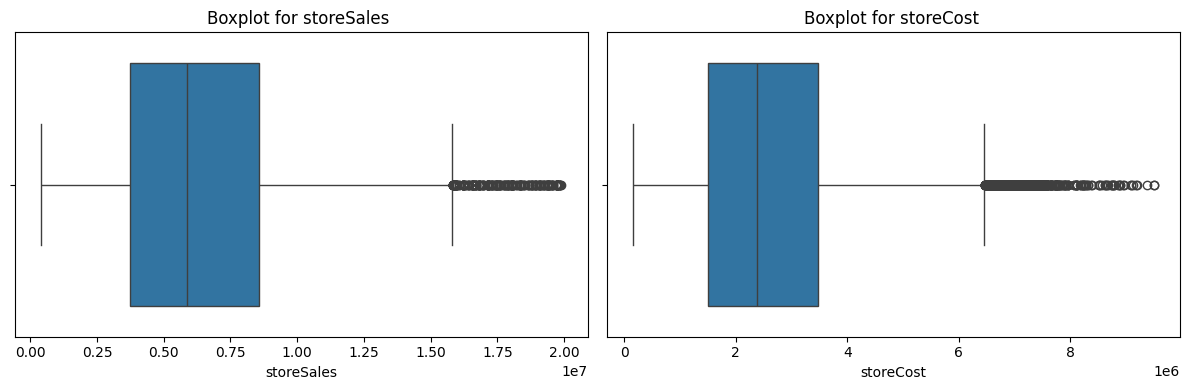

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols_to_plot = ["storeSales", "storeCost"]

fig, axes = plt.subplots(1, 2, figsize=(12,4))

for ax, col in zip(axes, cols_to_plot):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Boxplot for {col} ')

plt.tight_layout()
plt.show()


In [ ]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    upper_threshold = Q3 + 1.5 * IQR
    lower_threshold = Q1 - 1.5 * IQR

    df.loc[df[col] > upper_threshold, col] = np.nan
    df.loc[df[col] < lower_threshold, col] = np.nan

for column in ['storeSales', 'storeCost']:
    remove_outliers_iqr(df, column)


In [ ]:
df[['storeSales','storeCost']].describe()

,storeSales,storeCost
count,"39,995","39,625"
mean,"6,381,885","2,543,200"
std,"3,328,781","1,342,068"
min,"400,000","163,200"
25%,"3,740,000","1,484,000"
50%,"5,840,000","2,352,000"
75%,"8,520,000","3,418,500"
max,"15,800,000","6,458,400"


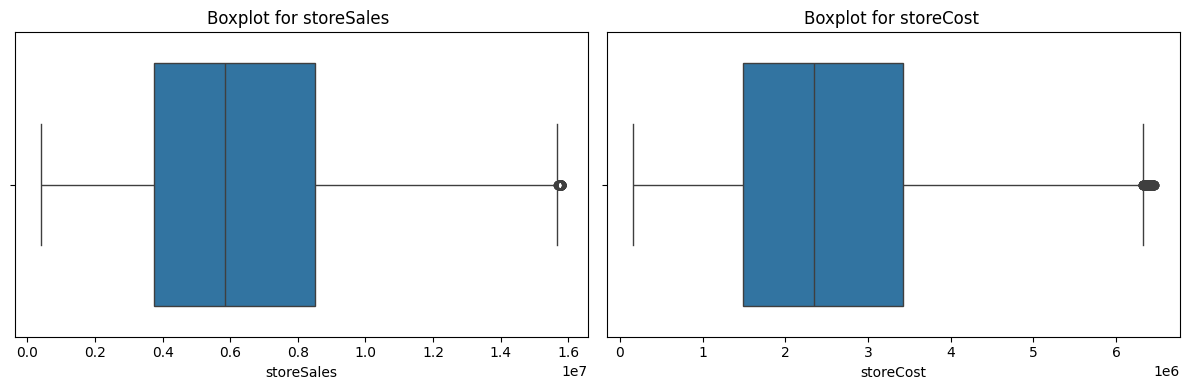

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols_to_plot = ["storeSales", "storeCost"]

fig, axes = plt.subplots(1, 2, figsize=(12,4))

for ax, col in zip(axes, cols_to_plot):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Boxplot for {col} ')

plt.tight_layout()
plt.show()


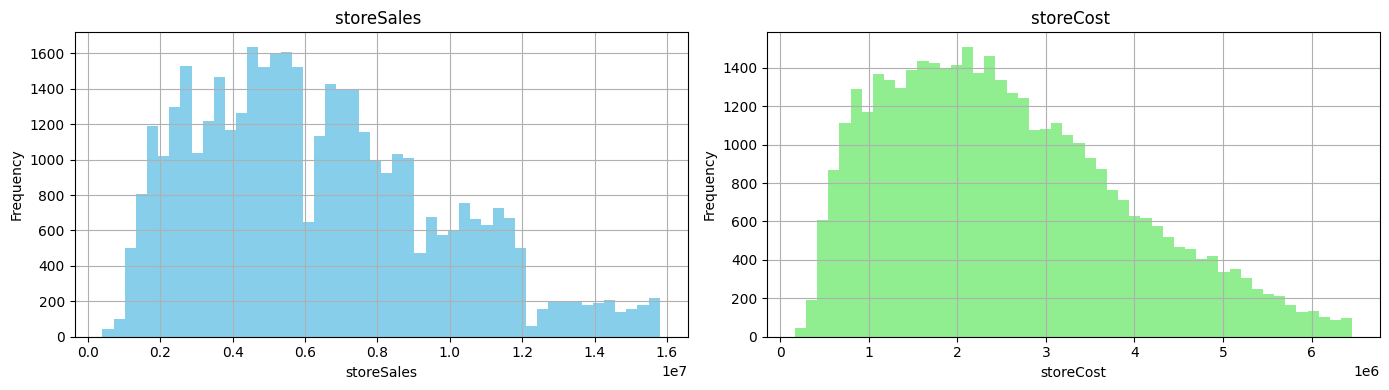

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Histogram storeSales
df['storeSales'].hist(bins=50, ax=axes[0], color='skyblue')
axes[0].set_title('storeSales ')
axes[0].set_xlabel('storeSales')
axes[0].set_ylabel('Frequency')

# Histogram storeCost
df['storeCost'].hist(bins=50, ax=axes[1], color='lightgreen')
axes[1].set_title('storeCost ')
axes[1].set_xlabel('storeCost')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
cols_to_clean = ['storeSales', 'storeCost']

for col in cols_to_clean:
    Test[col] = Test[col].astype(str).str.lower()
    Test[col] = Test[col].str.replace(r'[\(\)]', '', regex=True)
    millions_mask = Test[col].str.contains(r'millions?\.?', regex=True, na=False)
    Test[col] = Test[col].str.replace(r'millions?\.?', '', regex=True)
    Test[col] = Test[col].str.replace(r'illion', '', regex=True)
    Test[col] = Test[col].str.replace(r'ms?', '', regex=True)
    Test[col] = Test[col].str.replace(r'm\b', '', regex=True)
    Test[col] = Test[col].str.replace(r'[^0-9\.\-]', '', regex=True)
    Test[col] = pd.to_numeric(Test[col], errors='coerce')
    Test[col] = Test[col] * 1_000_000

Test.loc[Test['storeSales'] < 0, 'storeSales'] = np.nan
Test.loc[Test['storeCost'] < 0, 'storeCost'] = np.nan

def remove_outliers_iqr(Test, col):
    Q1 = Test[col].quantile(0.25)
    Q3 = Test[col].quantile(0.75)
    IQR = Q3 - Q1

    upper_threshold = Q3 + 1.5 * IQR
    lower_threshold = Q1 - 1.5 * IQR

    Test.loc[Test[col] > upper_threshold, col] = np.nan
    Test.loc[Test[col] < lower_threshold, col] = np.nan

for column in ['storeSales', 'storeCost']:
    remove_outliers_iqr(Test, column)

pd.set_option('display.float_format', '{:,.0f}'.format)


## `storeKind` column ✔️

- **Supermarket**: Large store selling a wide variety of products (food, household, etc.).  
- **Small Grocery**: Small neighborhood shop for daily essentials.  
- **Midsize**: Medium-sized store, between grocery and supermarket.  
- **Gourmet**: Specialty store for high-quality or imported food.  
- **Deluxe**: Premium/luxury store with upscale products and services.  


In [ ]:
df['storeKind'].isna().sum()

np.int64(6084)

In [ ]:
df['storeKind'] = df['storeKind'].str.capitalize().str.strip()
df['storeKind'] = df['storeKind'].str.replace(r'[\t\n_]', '', regex=True)
df['storeKind'] = df['storeKind'].replace(
    r'(?i)^(\-1|--|-999|1|Tbd|999|To be determined|Nil|Missing|Data missing|Not available|Not specified|unknown|\.{3}|###|\?+)$',
    np.nan,
    regex=True
)
df['storeKind'] = df['storeKind'].str.replace(r'[.:()\[\]@\$]', '', regex=True)
df['storeKind'] = df['storeKind'].str.replace(r'\s+', ' ', regex=True)
df['storeKind'] = (
    df['storeKind']
    .str.replace('0', 'o')
    .str.replace('1', 'i')
    .str.replace('3', 'e')
    .str.replace('4', 'a')
    .str.replace('5', 's')
)

In [ ]:
df['storeKind'].unique()

array(['Deluxe', 'Supermarket', nan, 'upermarket', 'deluxe',
       'supermarket', 'Deiuxe', 'Gourmet', 'gourmet', 'Mid-slze',
       'Small grocery', 'Supermerket', 'Daluxe', 'Supermarke7',
       'Mid-size', 'Gourme7', 'Suparmarket', 'Deluxa', 'Gourmat',
       'deiuxe', 'small grocery', 'mid-size', 'Supermarkat', 'Mid-ize',
       'Small grucery', 'Supermrket', 'Mid-siza', 'supermarke7',
       'Guurmet', 'mall grocery', 'daluxe', 'Smali grocery', 'gourme7',
       'supermerket', 'Mld-size', 'Smallgrocery', 'guurmet',
       'Smll grocery', 'Small grokery', 'Small grocary', 'mallgrocery',
       'supermrket', 'gourmat', 'deluxa', 'Smail grocery', 'suparmarket',
       'supermarkat', 'Small groçery', 'mid-slze', 'Smell grocery',
       'mld-size', 'smail grocery', 'Smailgrocery', 'mid-siza'],
      dtype=object)

In [ ]:
df['storeKind'].isna().sum()

np.int64(6162)

In [ ]:
choices = ['deluxe', 'supermarket', 'gourmet', 'midsize', 'small grocery']
def unify_storeKind(val):
    if pd.isna(val):
        return np.nan

    val_clean = str(val).lower().strip()
    if val_clean == "":
        return np.nan

    # fuzzy matching
    best_match = process.extractOne(val_clean, choices)
    if best_match and best_match[1] >= 80:  # threshold 80%
        return best_match[0]
    else:
        return np.nan

df['storeKind'] = df['storeKind'].apply(unify_storeKind)

In [ ]:
df['storeKind'].value_counts()

storeKind
supermarket      14803
deluxe           13036
gourmet           3703
midsize           1552
small grocery     1125
Name: count, dtype: int64

In [ ]:
df['storeKind'].isna().sum()

np.int64(6162)

In [ ]:
Test['storeKind'] = Test['storeKind'].str.capitalize().str.strip()
Test['storeKind'] = Test['storeKind'].str.replace(r'[\t\n_]', '', regex=True)
Test['storeKind'] = Test['storeKind'].replace(
    r'(?i)^(\-1|--|-999|1|Tbd|999|To be determined|Nil|Missing|Data missing|Not available|Not specified|unknown|\.{3}|###|\?+)$',
    np.nan,
    regex=True
)
Test['storeKind'] = Test['storeKind'].str.replace(r'[.:()\[\]@\$]', '', regex=True)
Test['storeKind'] = Test['storeKind'].str.replace(r'\s+', ' ', regex=True)
Test['storeKind'] = (
    Test['storeKind']
    .str.replace('0', 'o')
    .str.replace('1', 'i')
    .str.replace('3', 'e')
    .str.replace('4', 'a')
    .str.replace('5', 's')
)

choices = ['deluxe', 'supermarket', 'gourmet', 'midsize', 'small grocery']

def unify_storeKind(val):
    if pd.isna(val):
        return np.nan

    val_clean = str(val).lower().strip()
    if val_clean == "":
        return np.nan

    best_match = process.extractOne(val_clean, choices)
    if best_match and best_match[1] >= 80:  # threshold 80%
        return best_match[0]
    else:
        return np.nan

Test['storeKind'] = Test['storeKind'].apply(unify_storeKind)


----------------------

## imputing the `storeSales` and `storeCost`  and `storeKind` columns ✔️

In [ ]:
df[['storeSales', 'storeCost',"storeKind"]].isna().sum()

storeSales     386
storeCost      756
storeKind     6162
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer

imputed_cols = ['storeSales', 'storeCost']
imputer = KNNImputer(n_neighbors=5)
df[imputed_cols] = imputer.fit_transform(df[imputed_cols])

In [ ]:
df["storeKind"].unique()

array(['deluxe', 'supermarket', nan, 'gourmet', 'midsize',
       'small grocery'], dtype=object)

In [ ]:
from scipy.spatial import cKDTree

known = df[df['storeKind'].notna()]
missing = df[df['storeKind'].isna()]

# Build a KD-Tree on numerical columns of known rows
tree = cKDTree(known[['storeSales','storeCost']].values)

# Find the nearest neighbor for each missing row
distances, indices = tree.query(missing[['storeSales','storeCost']].values, k=1)

# Assign the storeKind of nearest neighbor
df.loc[df['storeKind'].isna(), 'storeKind'] = known.iloc[indices]['storeKind'].values

# Check results
print(df['storeKind'].unique())

['deluxe' 'supermarket' 'gourmet' 'midsize' 'small grocery']


In [ ]:
df['storeKind'].isna().sum()

np.int64(0)

## `meatArea`, `groceryArea` ,`frozenArea` ,`totalArea` columns ✔️

In [ ]:
print(df['meatArea'].isna().sum(), df['groceryArea'].isna().sum(), df['frozenArea'].isna().sum(), df['totalArea'].isna().sum())

2709 2737 2650 2721


In [ ]:
area_columns = ['meatArea', 'groceryArea', 'frozenArea', 'totalArea']
for col in area_columns:

    # Remove parentheses
    df.loc[df[col].str.contains(r'\(', na=False), col] = df.loc[df[col].str.contains(r'\(', na=False), col].str.strip('()')

    # Remove all non-digit except dot
    df[col] = pd.to_numeric(df[col], errors='coerce')

    # Replace negative values with NaN
    df.loc[df[col] < 0, col] = np.nan

In [ ]:
print(df['meatArea'].isna().sum(), df['groceryArea'].isna().sum(), df['frozenArea'].isna().sum(), df['totalArea'].isna().sum())

2799 2817 2725 2803


In [ ]:
df[area_columns]=df[area_columns].astype(float)
df.loc[df["totalArea"]>3700,"totalArea"] == np.nan
df.loc[df['frozenArea'] > 1000, 'frozenArea'] = np.nan

array([[<Axes: title={'center': 'meatArea'}>,
        <Axes: title={'center': 'groceryArea'}>],
       [<Axes: title={'center': 'frozenArea'}>,
        <Axes: title={'center': 'totalArea'}>]], dtype=object)

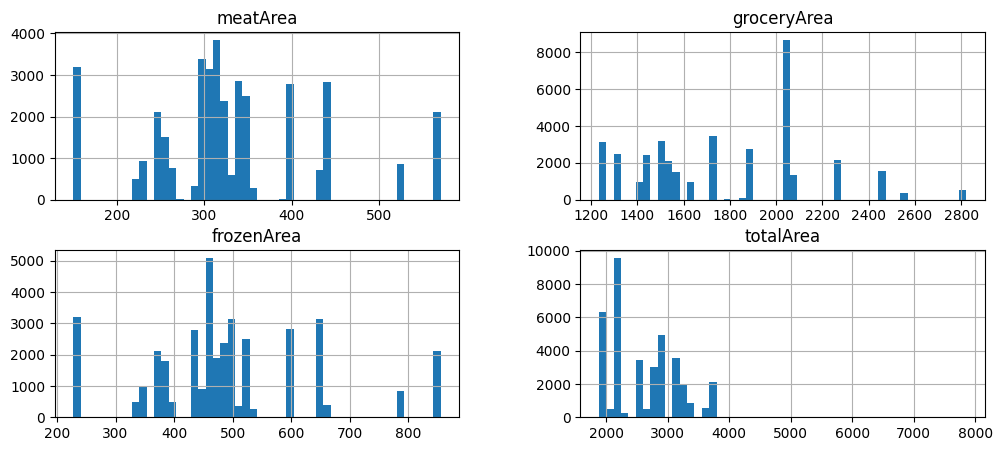

In [ ]:
df[area_columns].hist(bins=50, figsize=(12, 5))

##### Fill all the NaNs in the four areas columns

In [ ]:
# Define your columns
area_columns = ['meatArea', 'groceryArea', 'frozenArea', 'totalArea']

# Find rows with ANY NaN in these four columns
rows_with_nan = df[df[area_columns].isnull().any(axis=1)]

print(f"Found {len(rows_with_nan)} rows with at least one NaN in the area columns")
# rows_with_nan[area_columns]

Found 9625 rows with at least one NaN in the area columns


In [ ]:
# More efficient approach using vectorized operations
df_fixed = df.copy()

# Find rows with exactly one NaN in the four columns
nan_mask = df_fixed[area_columns].isnull()
single_nan_mask = nan_mask.sum(axis=1) == 1

print(f"Rows with exactly one NaN: {single_nan_mask.sum()}")

# Calculate missing meatArea
meat_nan_mask = single_nan_mask & nan_mask['meatArea'] & ~nan_mask['groceryArea'] & ~nan_mask['frozenArea'] & ~nan_mask['totalArea']
df_fixed.loc[meat_nan_mask, 'meatArea'] = (
    df_fixed.loc[meat_nan_mask, 'totalArea'] -
    df_fixed.loc[meat_nan_mask, 'groceryArea'] -
    df_fixed.loc[meat_nan_mask, 'frozenArea']
)

# Calculate missing groceryArea
grocery_nan_mask = single_nan_mask & nan_mask['groceryArea'] & ~nan_mask['meatArea'] & ~nan_mask['frozenArea'] & ~nan_mask['totalArea']
df_fixed.loc[grocery_nan_mask, 'groceryArea'] = (
    df_fixed.loc[grocery_nan_mask, 'totalArea'] -
    df_fixed.loc[grocery_nan_mask, 'meatArea'] -
    df_fixed.loc[grocery_nan_mask, 'frozenArea']
)

# Calculate missing frozenArea
frozen_nan_mask = single_nan_mask & nan_mask['frozenArea'] & ~nan_mask['meatArea'] & ~nan_mask['groceryArea'] & ~nan_mask['totalArea']
df_fixed.loc[frozen_nan_mask, 'frozenArea'] = (
    df_fixed.loc[frozen_nan_mask, 'totalArea'] -
    df_fixed.loc[frozen_nan_mask, 'meatArea'] -
    df_fixed.loc[frozen_nan_mask, 'groceryArea']
)

# Calculate missing totalArea
total_nan_mask = single_nan_mask & nan_mask['totalArea'] & ~nan_mask['meatArea'] & ~nan_mask['groceryArea'] & ~nan_mask['frozenArea']
df_fixed.loc[total_nan_mask, 'totalArea'] = (
    df_fixed.loc[total_nan_mask, 'meatArea'] +
    df_fixed.loc[total_nan_mask, 'groceryArea'] +
    df_fixed.loc[total_nan_mask, 'frozenArea']
)

print("Missing values filled using vectorized operations!")

Rows with exactly one NaN: 8199
Missing values filled using vectorized operations!


In [ ]:
#To fill rows with four nans in the four columns
# If these stores might have typical area sizes, use median values
median_values = df[['meatArea', 'groceryArea', 'frozenArea']].median()
total_median = median_values.sum()

# Fill all four columns for these rows
all_nan_mask = df[['meatArea', 'groceryArea', 'frozenArea', 'totalArea']].isnull().all(axis=1)
df.loc[all_nan_mask, 'meatArea'] = median_values['meatArea']
df.loc[all_nan_mask, 'groceryArea'] = median_values['groceryArea']
df.loc[all_nan_mask, 'frozenArea'] = median_values['frozenArea']
df.loc[all_nan_mask, 'totalArea'] = total_median

In [ ]:
df=df_fixed.copy()
df_clean = df.copy()
imputer = KNNImputer(n_neighbors=5)
area_columns3 = ['meatArea', 'groceryArea', 'frozenArea']

print(f"Before KNN - Missing values: {df_clean[area_columns3].isnull().sum().to_dict()}")

# Impute the three individual areas
imputed_values = imputer.fit_transform(df_clean[area_columns3])
df_clean[area_columns3] = imputed_values

# Step 3: Recalculate totalArea for consistency
df_clean['totalArea'] = df_clean['meatArea'] + df_clean['groceryArea'] + df_clean['frozenArea']

print(f"After cleaning - Missing values: {df_clean[area_columns3 + ['totalArea']].isnull().sum().to_dict()}")

Before KNN - Missing values: {'meatArea': 736, 'groceryArea': 736, 'frozenArea': 743}
After cleaning - Missing values: {'meatArea': 0, 'groceryArea': 0, 'frozenArea': 0, 'totalArea': 0}


In [ ]:
df=df_clean.copy()
print(df['meatArea'].isna().sum(), df['groceryArea'].isna().sum(), df['frozenArea'].isna().sum(), df['totalArea'].isna().sum())

0 0 0 0


array([[<Axes: title={'center': 'meatArea'}>,
        <Axes: title={'center': 'groceryArea'}>],
       [<Axes: title={'center': 'frozenArea'}>,
        <Axes: title={'center': 'totalArea'}>]], dtype=object)

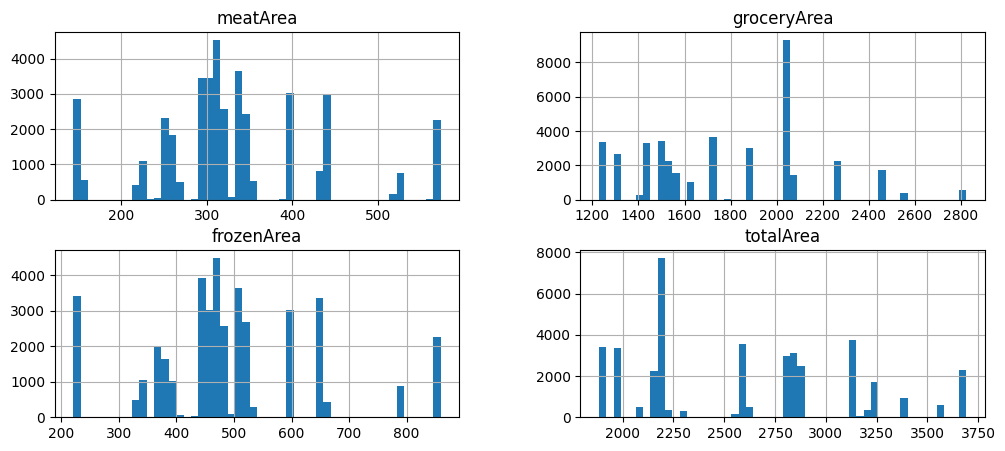

In [ ]:
df[['meatArea', 'groceryArea', 'frozenArea', 'totalArea']].hist(bins=50, figsize=(12, 5))

###### Test

In [ ]:
area_columns = ['meatArea','groceryArea','frozenArea', 'totalArea']

for col in area_columns:
    # Convert to string temporarily
    Test[col] = Test[col].astype(str)

    # Remove parentheses
    Test.loc[Test[col].str.contains(r'\(', na=False), col] = \
        Test.loc[Test[col].str.contains(r'\(', na=False), col].str.strip('()')

    # Convert back to numeric
    Test[col] = pd.to_numeric(Test[col], errors='coerce')

    # Replace negative values
    Test.loc[Test[col] < 0, col] = np.nan


# Ensure float type
Test[area_columns] = Test[area_columns].astype(float)

# Replace extreme values with NaN
Test.loc[Test["totalArea"] > 3700,"totalArea"] = np.nan
Test.loc[Test['frozenArea'] > 1000, 'frozenArea'] = np.nan


## `CustomerOrder` column

In [ ]:
df['customerOrder'] = df['customerOrder'].replace(
    r'(?i)^(\-1|--|-999|1|Tbd|999|To be determined|Nil|Missing|Data missing|Not available|Not specified|unknown|\.{3}|###|\?+)$',
    np.nan,
    regex=True
)
df['customerOrder'] = df['customerOrder'].str.lower().str.strip()
df['customerOrder'] = df['customerOrder'].str.replace(r'[\(\)\.]', '', regex=True)
df['product'] = df['customerOrder'].str.extract(r'(.+?)\s+from')[0].str.strip()

def simplify_product(x):
    if x in ['frozen desserts', 'frozen entrees', 'breakfast foods']:
        return 'frozen foods'
    elif x in ['baking goods', 'bread', 'jams and jellies']:
        return 'baked goods'
    elif x in ['hot beverages', 'carbonated beverages', 'pure juice beverages', 'drinks', 'beer and wine']:
        return 'beverages'
    elif x in ['hygiene', 'pain relievers', 'cold remedies', 'decongestants', 'bathroom products']:
        return 'health & hygiene'
    elif x in ['electrical', 'paper products', 'kitchen products', 'cleaning supplies', 'plastic products', 'hardware']:
        return 'household'
    elif x in ['meat', 'seafood', 'canned tuna']:
        return 'protein'
    elif x in ['fruit', 'vegetables', 'packaged vegetables', 'specialty']:
        return 'produce'
    else:
        return x

df['product_simplified'] = df['product'].apply(simplify_product)
df['brand'] = df['customerOrder'].str.extract(r'ordered brand\s*:\s*(.+)')[0].str.strip()
common_brand = df['brand'].value_counts()[df['brand'].value_counts() > 200].index
df['brand'] = df['brand'].apply(lambda x: x if x in common_brand else 'other')
df['product_brand'] = df['product_simplified'] + '_' + df['brand']

In [ ]:
df['customerOrder'].isna().sum()
df=df.drop(columns=['customerOrder'])

In [ ]:
col_to_Fill_missing= ['product_brand','product_simplified','brand']

for i in col_to_Fill_missing :
    df[i]=df[i].fillna('other')

In [ ]:
# df['brand'].head()

In [ ]:
Test['customerOrder'] = Test['customerOrder'].replace(
    r'(?i)^(\-1|--|-999|1|Tbd|999|To be determined|Nil|Missing|Data missing|Not available|Not specified|unknown|\.{3}|###|\?+)$',
    np.nan,
    regex=True
)
Test['customerOrder'] = Test['customerOrder'].str.lower().str.strip()
Test['customerOrder'] = Test['customerOrder'].str.replace(r'[\(\)\.]', '', regex=True)
Test['product'] = Test['customerOrder'].str.extract(r'(.+?)\s+from')[0].str.strip()
Test['product_simplified'] = Test['product'].apply(simplify_product)
Test['brand'] = Test['customerOrder'].str.extract(r'ordered brand\s*:\s*(.+)')[0].str.strip()
common_brand = Test['brand'].value_counts()[Test['brand'].value_counts() > 200].index
Test['brand'] = Test['brand'].apply(lambda x: x if x in common_brand else 'other')
Test['product_brand'] = Test['product_simplified'] + '_' + Test['brand']
Test=Test.drop(columns=['customerOrder'])

## `cost` column

In [ ]:
# df['cost'].value_counts()

In [ ]:
df["cost"] = df["cost"].astype(str).str.extract(r"([-+]?\d*\.?\d+)")[0]
df["cost"] = pd.to_numeric(df["cost"], errors="coerce")

In [ ]:
df["cost"].isnull().sum()

np.int64(137)

In [ ]:
df["cost"]=df["cost"].astype(float)

<Axes: >

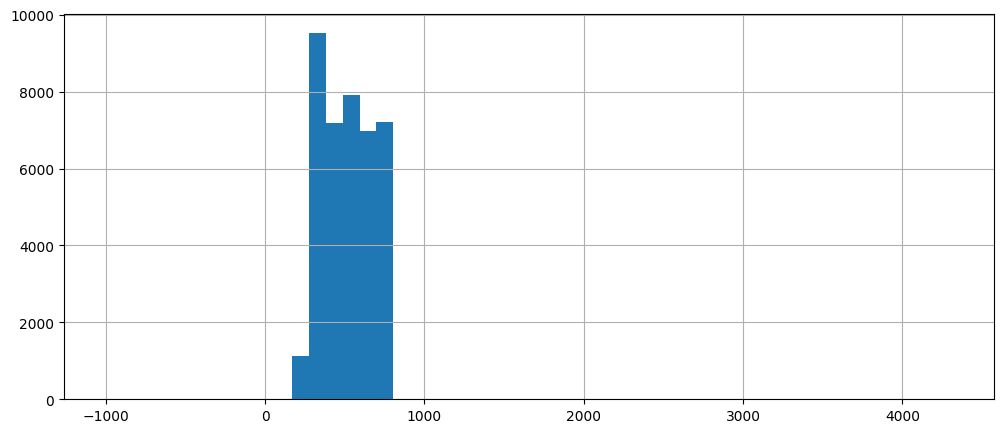

In [ ]:
df['cost'].hist(bins=50, figsize=(12, 5))

In [ ]:
df.loc[df['cost'] < 200, 'cost'] = np.nan
df.loc[df['cost'] > 1000, 'cost'] = np.nan

<Axes: >

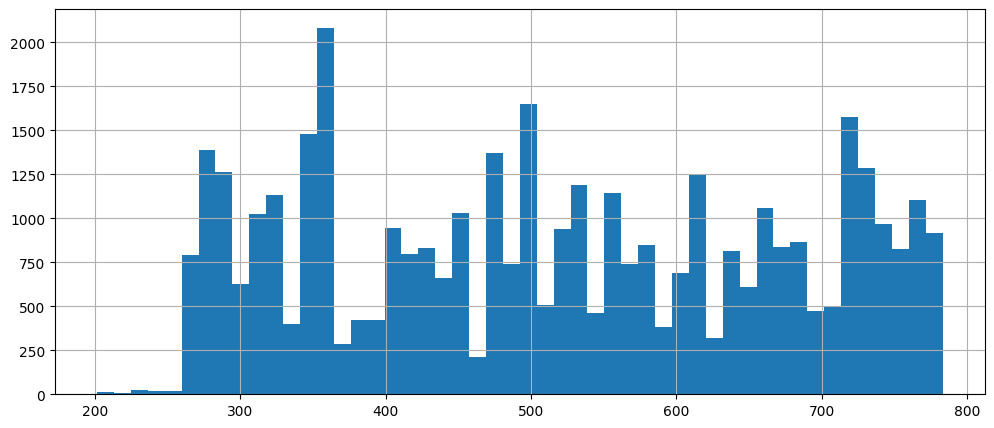

In [ ]:
df['cost'].hist(bins=50, figsize=(12, 5))

In [ ]:
imputer = KNNImputer(n_neighbors=5)

df[['cost']] = imputer.fit_transform(df[['cost']])

## `additionalFeaturesInMarket` column

In [ ]:
df['additionalFeaturesInMarket'].isna().sum()

np.int64(4533)

In [ ]:

# placeholders that should become NaN (excluding the [] cases)
invalid_values = {
    "-1", "--", "###", "-999", "TBD", "Not Available",
    "Not Specified", "Not Specified ", "unknown", "missing",
    "Missing value", "To Be Determined", "...",
}

# special "empty list" strings that should become []
empty_list_values = {"[]", "[].", "[] ."}

def to_list(x):
    if pd.isna(x):
        return np.nan

    if isinstance(x, str):
        val = x.strip()

        # special case → real empty list
        if val in empty_list_values:
            return []

        # invalid placeholders → NaN
        if val in invalid_values:
            return np.nan

        # remove wrapping parentheses: (['A','B']) -> ['A','B']
        val = re.sub(r"^\(|\)$", "", val)

        try:
            parsed = ast.literal_eval(val)
            if isinstance(parsed, (str, int, float)):
                return [parsed]
            if isinstance(parsed, tuple):
                return list(parsed)
            return parsed
        except:
            return [val]

    if isinstance(x, list):
        return x

    return np.nan  # fallback


# 1. Clean the column
df["additionalFeaturesInMarket"] = df["additionalFeaturesInMarket"].apply(to_list)

# 2. Count features (len for lists, NaN otherwise)
df["count_additional_features"] = df["additionalFeaturesInMarket"].apply(
    lambda x: len(x) if isinstance(x, list) else np.nan
)


In [ ]:
df['additionalFeaturesInMarket'].head()

0    [Video Store, Florist, Ready Food, Coffee Bar,...
1                                                  NaN
2                                            [Florist]
3                                         [Coffee Bar]
4    [Bar For Salad, Ready Food, Coffee Bar, Video ...
Name: additionalFeaturesInMarket, dtype: object

In [ ]:
imputer = knn(n_neighbors=5)
df['count_additional_features'] = np.round(imputer.fit_transform(df[['count_additional_features']]))

In [ ]:
df['count_additional_features'].value_counts()

count_additional_features
5    14309
1     7378
4     5354
3     4600
0     4395
2     4345
Name: count, dtype: int64

In [ ]:
df.drop(columns=['additionalFeaturesInMarket'], inplace=True)

In [ ]:
Test["additionalFeaturesInMarket"] = Test["additionalFeaturesInMarket"].apply(to_list)
Test["count_additional_features"] = Test["additionalFeaturesInMarket"].apply(lambda x: len(x) if isinstance(x, list) else np.nan)
Test.drop(columns=['additionalFeaturesInMarket'], inplace=True)

## `seller_city` column

In [ ]:
df["seller_city"].value_counts()

seller_city
sao paulo                                 5331
ibitinga                                  1236
SAO PAULO                                  682
curitiba                                   594
Sao Paulo                                  585
belo horizonte                             560
santo andre                                539
guarulhos                                  496
rio de janeiro                             495
ribeirao preto                             473
maringa                                    427
sao jose do rio preto                      404
piracicaba                                 327
campinas                                   299
guariba                                    279
praia grande                               263
itaquaquecetuba                            262
sao bernardo do campo                      251
salto                                      244
campo limpo paulista                       217
jacarei                                    192
l

lets drop and back again

In [ ]:
df.drop(columns=['seller_city'], inplace=True)

In [ ]:
Test.drop(columns=['seller_city'], inplace=True)

## `seller_state` column

In [ ]:
df['seller_state'].isna().sum()

np.int64(308)

In [ ]:
# df['seller_state'].value_counts()

In [ ]:
# ! pip install rapidfuzz

In [ ]:
from rapidfuzz import process as proces
from rapidfuzz import fuzz as fuz

def clean_seller_state(state_series, min_score=60):
    """
    Clean and standardize seller state values using fuzzy matching.

    Parameters:
    -----------
    state_series : pandas Series
        The series containing state values to clean
    min_score : int, default=60
        Minimum fuzzy matching score to accept a match

    Returns:
    --------
    pandas Series
        Cleaned and standardized state values
    """

    # Define valid Brazilian states
    valid_states = [
        "AC", "AL", "AP", "AM", "BA", "CE", "DF", "ES", "GO", "MA",
        "MT", "MS", "MG", "PA", "PB", "PR", "PE", "PI", "RJ", "RN",
        "RS", "RO", "RR", "SC", "SP", "SE", "TO"
    ]

    def match_state(value, valid_states, min_score):
        if pd.isna(value):
            return np.nan

        # Convert to string, uppercase, and strip whitespace
        value = str(value).upper().strip()

        # Remove underscores and other non-letter characters (but keep Ç for CE)
        value = re.sub(r"[^A-ZÇ]", "", value)

        if not value or value in ["NIL", "UNKNOWN", "MISSING", "DATA", "NOTSPECIFIED",
                                 "TBD", "TODETERMINED", "NOTAVAILABLE"]:
            return np.nan

        # Fix common character confusions
        value = (value.replace("Ç", "C")
                     .replace("0", "O")
                     .replace("5", "S")
                     .replace("4", "A")
                     .replace("1", "I")
                     .replace("7", "T")
                     .replace("8", "B")
                     .replace("$", "S")
                     .replace("@", "A")
                     .replace("3", "E"))

        # If it's already valid, return directly
        if value in valid_states:
            return value

        # Fuzzy match with valid states
        match, score, _ = proces.extractOne(value, valid_states, scorer=fuz.ratio)

        if score >= min_score:
            return match
        return np.nan

    # Apply the cleaning function to the series
    return state_series.apply(lambda x: match_state(x, valid_states, min_score))

# Usage example:
df["seller_state"] = clean_seller_state(df["seller_state"])

In [ ]:
df["seller_state"].isnull().sum()

np.int64(540)

In [ ]:
# df["seller_state"].value_counts()

In [ ]:
df.fillna({'seller_state': 'SP'}, inplace=True)

In [ ]:
Test["seller_state"] = clean_seller_state(Test["seller_state"])

## `review_score` column

In [ ]:
df["review_score"].isna().sum()

np.int64(300)

In [ ]:
# df["review_score"].unique()

In [ ]:
def clean_review_score(df, col='review_score'):
    df_clean = df.copy()

    # Convert to string for processing
    df_clean[col] = df_clean[col].astype(str).str.strip()

    # Function to extract numeric score from each value
    def extract_score(value):
        # Handle NaN and invalid values first
        if value in ['nan', 'None', 'NaN', 'NULL', 'null', '']:
            return np.nan

        # Handle known invalid entries
        invalid_values = ['Not Specified', 'Data Missing', '###', 'To Be Determined',
                         'Not Available', 'TBD', '-999', 'nil', '--', '?', 'unknown',
                         'missing', '-1']
        if value in invalid_values:
            return np.nan

        # Extract numeric patterns
        patterns = [
            r'(\d+\.\d+)',  # 5.0, 4.0, etc.
            r'(\d+)%',      # 100%, 80%, etc.
            r'(\d+)/5',     # 4/5, 3/5, etc. (convert to 20-point scale)
            r'(\d+)/10',    # 8/10, 6/10, etc. (convert to 10-point scale)
            r'Rating:\s*(\d+\.?\d*)',  # Rating: 5.0
            r'val:\s*(\d+\.?\d*)',     # val: 5.0
            r'data:\s*(\d+\.?\d*)',    # data: 5.0
            r'measure:\s*(\d+\.?\d*)', # measure: 5.0
            r'amount:\s*(\d+\.?\d*)',  # amount: 5.0
            r'(\d+)\s*stars',          # 5 stars
        ]

        for pattern in patterns:
            match = re.search(pattern, value, re.IGNORECASE)
            if match:
                score = float(match.group(1))

                # Convert percentages to 5-point scale
                if '%' in value:
                    return (score / 20)  # 100% → 5.0, 80% → 4.0, etc.

                # Convert x/10 scale to 5-point scale
                if '/10' in value.lower():
                    return score / 2

                # Convert x/5 scale (if not already decimal)
                if '/5' in value.lower() and score <= 5:
                    return score

                return min(score, 5.0)  # Cap at 5.0

        # If no pattern matched but it's a simple number
        try:
            score = float(value)
            return min(score, 5.0) if score > 0 else np.nan
        except (ValueError, TypeError):
            return np.nan

    # Apply the extraction function
    df_clean[col] = df_clean[col].apply(extract_score)

    # Round to 1 decimal place for consistency
    df_clean[col] = df_clean[col].round(1)

    return df_clean

In [ ]:
df = clean_review_score(df, 'review_score')

In [ ]:
df["review_score"].isna().sum()

np.int64(428)

In [ ]:
df["review_score"].value_counts()

review_score
5    22619
4     7859
1     4714
3     3422
2     1339
Name: count, dtype: int64

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df['review_score'] = imputer.fit_transform(df[['review_score']])
df['review_score'] = df['review_score'].round(0)

In [ ]:
df["review_score"].value_counts()

review_score
5    22619
4     8287
1     4714
3     3422
2     1339
Name: count, dtype: int64

In [ ]:
Test = clean_review_score(Test, 'review_score')

## `customer_city` column

In [ ]:
# df['customer_city'].value_counts()

In [ ]:
df.drop(columns=['customer_city'], inplace=True)

In [ ]:
Test.drop(columns=['customer_city'], inplace=True)

## `customer_state`	column

In [ ]:
df['customer_state'].isna().sum()

np.int64(29)

In [ ]:
# df['customer_state'].value_counts()

In [ ]:
from rapidfuzz import process as proces
from rapidfuzz import fuzz as fuz

def clean_seller_state(state_series, min_score=60):
    """
    Clean and standardize seller state values using fuzzy matching.

    Parameters:
    -----------
    state_series : pandas Series
        The series containing state values to clean
    min_score : int, default=60
        Minimum fuzzy matching score to accept a match

    Returns:
    --------
    pandas Series
        Cleaned and standardized state values
    """

    # Define valid Brazilian states
    valid_states = [
        "AC", "AL", "AP", "AM", "BA", "CE", "DF", "ES", "GO", "MA",
        "MT", "MS", "MG", "PA", "PB", "PR", "PE", "PI", "RJ", "RN",
        "RS", "RO", "RR", "SC", "SP", "SE", "TO"
    ]

    def match_state(value, valid_states, min_score):
        if pd.isna(value):
            return np.nan

        # Convert to string, uppercase, and strip whitespace
        value = str(value).upper().strip()

        # Remove underscores and other non-letter characters (but keep Ç for CE)
        value = re.sub(r"[^A-ZÇ]", "", value)

        if not value or value in ["NIL", "UNKNOWN", "MISSING", "DATA", "NOTSPECIFIED",
                                 "TBD", "TODETERMINED", "NOTAVAILABLE"]:
            return np.nan

        # Fix common character confusions
        value = (value.replace("Ç", "C")
                     .replace("0", "O")
                     .replace("5", "S")
                     .replace("4", "A")
                     .replace("1", "I")
                     .replace("7", "T")
                     .replace("8", "B")
                     .replace("$", "S")
                     .replace("@", "A")
                     .replace("3", "E"))

        # If it's already valid, return directly
        if value in valid_states:
            return value

        # Fuzzy match with valid states
        match, score, _ = proces.extractOne(value, valid_states, scorer=fuz.ratio)

        if score >= min_score:
            return match
        return np.nan

    # Apply the cleaning function to the series
    return state_series.apply(lambda x: match_state(x, valid_states, min_score))

# Usage example:
df["customer_state"] = clean_seller_state(df["customer_state"])

In [ ]:
# df['customer_state'].value_counts()

In [ ]:
df['customer_state'].isna().sum()

np.int64(528)

In [ ]:
df['customer_state'].fillna('SP', inplace=True)

In [ ]:
Test["customer_state"] = clean_seller_state(Test["customer_state"])

## `personalDescription` column

In [ ]:
# df['personDescription'].isna().sum()

In [ ]:
from thefuzz import process
from fuzzywuzzy import process

df["clean_desc"] = df["personDescription"].str.lower()
df["clean_desc"] = df["clean_desc"].astype(str)
df["clean_desc"] = df["clean_desc"].str.replace(r"[^a-z\s]", " ", regex=True)
df["clean_desc"] = df["clean_desc"].str.replace(r"\s+", " ", regex=True).str.strip()


def fuzzy_extract(text, keywords, threshold=80):
    for word in text.split():
        match = process.extractOne(word, keywords)
        if match and match[1] >= threshold:
            return match[0]
    return None

marital_keywords = ["single", "married"]
gender_keywords = ["male", "female"]

df["marital_status"] = df["clean_desc"].apply(lambda x: fuzzy_extract(x, marital_keywords))
df["gender"] = df["clean_desc"].apply(lambda x: fuzzy_extract(x, gender_keywords))

In [ ]:
df[["marital_status","gender"]].isna().sum()

marital_status    116
gender            116
dtype: int64

In [ ]:
df['marital_status'].value_counts()

marital_status
single     20369
married    19896
Name: count, dtype: int64

In [ ]:
def random_impute(series):
    probs = series.value_counts(normalize=True)
    missing_mask = series.isna()
    series.loc[missing_mask] = np.random.choice(probs.index,
                                                size=missing_mask.sum(),
                                                p=probs.values)
    return series

df['gender'] = random_impute(df['gender'])
df['marital_status'] = random_impute(df['marital_status'])

In [ ]:
df['marital_status'].value_counts()

marital_status
single     20421
married    19960
Name: count, dtype: int64

In [ ]:
df.drop(columns=['personDescription','clean_desc'], inplace=True)

In [ ]:
Test["clean_desc"] = Test["personDescription"].str.lower()
Test["clean_desc"] = Test["clean_desc"].astype(str)
Test["clean_desc"] = Test["clean_desc"].str.replace(r"[^a-z\s]", " ", regex=True)
Test["clean_desc"] = Test["clean_desc"].str.replace(r"\s+", " ", regex=True).str.strip()
Test["marital_status"] = Test["clean_desc"].apply(lambda x: fuzzy_extract(x, marital_keywords))
Test["gender"] = Test["clean_desc"].apply(lambda x: fuzzy_extract(x, gender_keywords))


Test.drop(columns=['personDescription','clean_desc'], inplace=True)

## `min.YearIncome` column

In [ ]:
# df["min.YearlyIncome"].value_counts()

In [ ]:
df['min.YearlyIncome'].isna().sum()

np.int64(43)

In [ ]:
def clean_income(value):
    if pd.isna(value):
        return np.nan

    val = str(value).lower().strip()

    val = re.sub(r'[\$\€]|income:|or more|annually|\+|,', '', val)
    val = val.strip()

    num_match = re.findall(r'\d+', val)
    if not num_match:
        return np.nan
    num = int(num_match[0])


    if "monthly" in val:
        num *= 12
    elif "k" in val or "thousand" in val:
        num *= 1000

    # استبعاد القيم الغريبة
    if num in [-999, 999, 1, -1]:
        return np.nan

    return num

df["min.YearlyIncome"] = df["min.YearlyIncome"].apply(clean_income)

In [ ]:
df['min.YearlyIncome'].isna().sum()

np.int64(128)

In [ ]:
def random_impute(series):
    series = series.copy()
    probs = series.value_counts(normalize=True)
    missing_mask = series.isna()
    series.loc[missing_mask] = np.random.choice(probs.index,
                                                size=missing_mask.sum(),
                                                p=probs.values)
    return series

df['min.YearlyIncome'] = random_impute(df['min.YearlyIncome'])


In [ ]:
# df['min.YearlyIncome'].value_counts()

##### Test

In [ ]:
Test["min.YearlyIncome"] = Test["min.YearlyIncome"].apply(clean_income)

## `isRecyclable?` column

In [ ]:
df["isRecyclable?"].value_counts()

isRecyclable?
recyclable          11346
yes                 11011
non recyclable       8983
no                   8876
Data Missing           11
unknown                10
TBD                     8
-999                    7
Not Specified           7
-1                      6
missing                 6
...                     6
(yes)                   5
no                      5
Recyclable              4
--                      4
?                       4
 yes                    3
No                      3
###                     3
To Be Determined        3
(no)                    3
 recyclable             3
yes                     3
nil                     2
YES                     2
yes.                    2
non recyclable          2
recyclable              2
non recyclable.         2
no.                     2
Not Available           1
Yes                     1
RECYCLABLE              1
recyclable.             1
NON RECYCLABLE          1
(recyclable)            1
Name: count, dtype: int6

In [ ]:
def clean_recyclable_status(status):
    if pd.isna(status):
        return np.nan

    status = str(status).strip().lower()

    # Yes variations
    if status in ['recyclable', 'yes', 'yes.', '(yes)', 'recyclable.', '(recyclable)',
                 ' recyclable', 'yes ', ' yes', 'recyclable', 'yes']:
        return 'Yes'

    # No variations
    elif status in ['non recyclable', 'no', 'no.', '(no)', 'non recyclable.', 'non recyclable',
                   'no', 'non recyclable', 'No', 'NON RECYCLABLE']:
        return 'No'

    # Missing/Unknown data
    elif status in ['', 'unknown', 'data missing', 'missing', 'tbd', 'to be determined',
                   'not specified', 'not available', '-999', '-1', '?', '--', '###', 'nil',
                   '...']:
        return np.nan

    else:
        return np.nan  # Default for any unexpected values

In [ ]:
df['isRecyclable?'] = df['isRecyclable?'].apply(lambda x: clean_recyclable_status(x))

In [ ]:
df["isRecyclable?"].value_counts()

isRecyclable?
Yes    22385
No     17877
Name: count, dtype: int64

In [ ]:
df['isRecyclable?'].isna().sum()

np.int64(119)

In [ ]:
df['isRecyclable?'].fillna('Yes', inplace=True)

In [ ]:
df["isRecyclable?"].value_counts()

isRecyclable?
Yes    22504
No     17877
Name: count, dtype: int64

In [ ]:
Test['isRecyclable?'] = Test['isRecyclable?'].apply(lambda x: clean_recyclable_status(x))

## `promotionName` column

In [ ]:
df["promotionName"].value_counts()

promotionName
Weekend Discount             1332
Save Price                   1328
Two Day Sale                 1311
Price Winners                1191
Super Savers                 1124
Save It (Sale)               1115
Super Duper Savers           1093
One Day Sale                 1039
Roller Savings (High)        1021
Sale : Double Down           1005
GLD                           994
Price Slashers                953
Shelf Clearing Days           943
Full Free                     927
Lottery Cash Registerion      865
Go For It                     851
Two for One                   822
Money Savers                  820
Big Time Discounts            801
Price Destroyers              774
Saving Days                   741
Budget Bargains               739
Best Price Savers             680
Discount Frenzy               676
Dimes Off                     655
Promo Big                     627
You Save Days                 620
Savings Galore                614
Sales Days                    609


In [ ]:
df['promotionName'] = df['promotionName'].str.lower()
df['promotionName'] = df['promotionName'].str.strip()
df['promotionName'] = df['promotionName'].str.replace('.', '', regex=False)
df['promotionName'] = df['promotionName'].str.replace(r'[\(\)]', '', regex=True)
invalid_values = ["-999","-1", "--", "###", "?", "nil","..." ,"not available",
                  "not specified", "missing", "data missing", "tbd", "to be determined","unknown",""]

df["promotionName"] = df["promotionName"].replace(invalid_values, np.nan)

In [ ]:
df['promotionName'].isna().sum()

np.int64(6195)

In [ ]:
df['promotionName'].unique()

array(['dimes off', 'budget bargains', 'shelf emptiers', 'savings galore',
       'sale winners', 'weekend discount', 'price winners',
       'shelf clearing days', 'big time discounts',
       'lottery cash registerion', 'pick your savings', nan,
       'super savers', 'two day sale', 'sale sale sale', 'wallet savers',
       'money savers', 'save price', 'best savings', 'big time saving',
       'bag stuffer', 'save it sale', 'dollar days', 'discount frenzy',
       'sales days', 'sale : double down', 'coupon spectacular',
       'three for one', 'super duper savers', 'gld', 'go for it',
       'mystery sale', 'one day sale', 'i cant believe it sale',
       'you save days', 'double your savings', 'full free', 'saving days',
       'roller savings high', 'green light special', 'price slashers',
       'price cutters', 'two for one', 'promo big', 'price destroyers',
       'tip top savings', 'best price savers', 'super wallet savers',
       'price smashers', 'fantastic discounts'], d

In [ ]:
def simplify_promotion(name):
    if pd.isna(name):
        return np.nan

    val = str(name).strip()
    val = re.sub(r'[.:()\[\]-]', '', val)

    # تعريف rules لكل فئة
    rules = {
        "Time Sale": [
            r"day", r"days", r"weekend", r"mystery", r"dollar"
        ],
        "Quantity Sale": [
            r"two\s*for\s*one", r"three\s*for\s*one", r"double"
        ],
        "Price/Discount": [
            r"save", r"saver", r"saving", r"price", r"discount", r"slash",
            r"smash", r"off", r"bargain", r"deal", r"stuffer", r"big time", r"roller"
        ],
        "Coupon/Lottery": [
            r"coupon", r"lottery", r"promo"
        ],
        "Free/Special": [
            r"free", r"special", r"gld", r"go for it", r"shelf emptier", r"cant believe"
        ]
    }

    for category, patterns in rules.items():
        for pat in patterns:
            if re.search(pat, val, re.IGNORECASE):
                return category

    return "Other"

df["promoCategory"] = df["promotionName"].apply(simplify_promotion)


In [ ]:
df["promoCategory"].value_counts()

promoCategory
Price/Discount    17622
Time Sale          7214
Free/Special       4054
Quantity Sale      2547
Coupon/Lottery     1712
Other              1037
Name: count, dtype: int64

In [ ]:
df['promoCategory'].isna().sum()

np.int64(6195)

In [ ]:
other_values = df.loc[df["promoCategory"] == "Other", "promotionName"]
print("Top values in 'Other'")
other_values.value_counts()

Top values in 'Other'


promotionName
sale winners      525
sale sale sale    512
Name: count, dtype: int64

##### `PromoCategory`'s relationship with other columns

In [ ]:
from scipy.stats import chi2_contingency

def chi_square_test(df, col1, col2):
    """Run Chi-Square test between two categorical columns"""
    contingency = pd.crosstab(df[col1], df[col2])

    chi2, p, dof, expected = chi2_contingency(contingency)

    # Cramér’s V
    n = contingency.sum().sum()
    phi2 = chi2 / n
    r, k = contingency.shape
    cramers_v = np.sqrt(phi2 / min(r - 1, k - 1))

    return {
        "col1": col1,
        "col2": col2,
        "Chi2": chi2,
        "p-value": p,
        "dof": dof,
        "Cramers V": cramers_v
    }

cols_to_test = ["storeCost", "storeSales","totalArea","groceryArea","grossWeight"]

results = [chi_square_test(df, col, "promoCategory") for col in cols_to_test]

results_df = pd.DataFrame(results).sort_values(by="Cramers V", ascending=False)
results_df

,col1,col2,Chi2,p-value,dof,Cramers V
2,totalArea,promoCategory,"64,459",0,54960,1
3,groceryArea,promoCategory,"45,985",0,35690,1
0,storeCost,promoCategory,"44,230",0,41420,1
4,grossWeight,promoCategory,"7,213",0,6920,0
1,storeSales,promoCategory,"5,656",0,5240,0


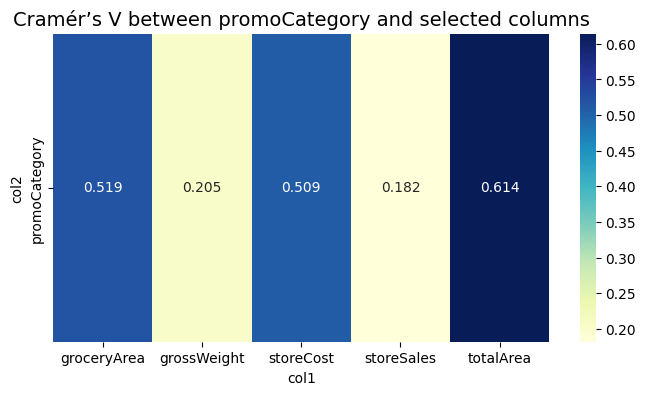

In [ ]:
heatmap_data = results_df.pivot(index="col2", columns="col1", values="Cramers V")
plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Cramér’s V between promoCategory and selected columns", fontsize=14)
plt.show()


#### fill na

- Using **storeCost** to impute **promoCategory** is statistically acceptable (since there is a correlation), but it is **not a direct causal relationship**.

- Logically, the relationship is stronger with **storeSales** or **storeKind**, as they reflect the store's size and nature.


In [ ]:
df['totalArea_bin'] = pd.qcut(df['totalArea'], q=10, duplicates='drop')

probs = (
    df.groupby('totalArea_bin')['promoCategory']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)


def fill_with_distribution(row):
    if pd.isna(row['promoCategory']):
        bin_val = row['totalArea_bin']
        if bin_val in probs.index:
            return np.random.choice(probs.columns, p=probs.loc[bin_val].values)
    return row['promoCategory']

# 4. تعويض القيم الناقصة
df['promoCategory'] = df.apply(fill_with_distribution, axis=1)

# 5. حذف العمود المساعد
df.drop(columns=['totalArea_bin'], inplace=True)


In [ ]:
df['promoCategory'].value_counts()

promoCategory
Price/Discount    20851
Time Sale          8508
Free/Special       4811
Quantity Sale      2965
Coupon/Lottery     1995
Other              1251
Name: count, dtype: int64

In [ ]:
df.drop(columns=['promotionName'], inplace=True)

In [ ]:
Test["promoCategory"] = Test["promotionName"].apply(simplify_promotion)
Test.drop(columns=['promotionName'], inplace=True)

## `grossWeight` column ✅

هو الوزن الإجمالي للمنتج = Gross Weight

+ ➝ Gross Weight= Net Weight + Package Weight
+ ➝ Package Weight = Gross Weight − Net Weight
+ ➝ Net Weight= Gross Weight − Package Weight

In [ ]:
# df["grossWeight"].value_counts()
# ملحوظه عدد القيم السالبه 2112
# محلوظه ادق حرفيا قيم سالبه بس خدعه هما مش سالب 1699

In [ ]:
df['grossWeight'].isna().sum()

np.int64(0)

In [ ]:
df['grossWeight'] = df['grossWeight'].replace(
    r'(?i)^(-1(\.0+)?|-0\.1+|-999(\.0+)?|999|1|tbd|to be determined|nil|missing|data missing|not available|not specified|unknown|amount: nan|\.{3}|###|\?+|--)$',
    np.nan,
    regex=True
)

df['grossWeight'] = df['grossWeight'].replace(
    r'(?i)^(data:|val:|amount:|measure:)\s*',  # case insensitive
    '',
    regex=True
)

In [ ]:
df["grossWeight"].isna().sum()

np.int64(0)

In [ ]:
def clean_weight(value):
    if pd.isna(value):
        return np.nan

    s = str(value).strip().lower()
    s = re.sub(r'^(data:|val:|amount:|measure:)\s*', '', s)
    s = s.replace(',', '')

    try:
        if re.search(r'kg$', s):
            num = re.sub(r'kg$', '', s).strip()
            return round(float(num), 4)

        elif re.search(r'grams?$', s):
            num = re.sub(r'grams?$', '', s).strip()
            return round(float(num) / 1000, 4)

        elif re.search(r'lbs?$', s):
            num = re.sub(r'lbs?$', '', s).strip()
            return round(float(num) * 0.453592, 4)

        elif re.search(r'oz$', s):
            num = re.sub(r'oz$', '', s).strip()
            return round(float(num) * 0.0283495, 4)

        else:
            return round(float(s), 4)  # الرقم بدون وحدة
    except ValueError:
        return np.nan

# تطبيق الدالة على العمود
df["grossWeight"] = df["grossWeight"].apply(clean_weight)

# تحويل القيم السالبة لموجبة
df.loc[df["grossWeight"] < 0, "grossWeight"] = df["grossWeight"].abs()


In [ ]:
# df['grossWeight'].value_counts()

In [ ]:
df['grossWeight'].isna().sum()

np.int64(0)

##### TEST

In [ ]:
Test['grossWeight'] = Test['grossWeight'].replace(
    r'(?i)^(-1(\.0+)?|-0\.1+|-999(\.0+)?|999|1|tbd|to be determined|nil|missing|data missing|not available|not specified|unknown|amount: nan|\.{3}|###|\?+|--)$',
    np.nan,
    regex=True
)

Test['grossWeight'] = Test['grossWeight'].replace(
    r'(?i)^(data:|val:|amount:|measure:)\s*',  # case insensitive
    '',
    regex=True
)

Test["grossWeight"] = Test["grossWeight"].apply(clean_weight)
Test.loc[Test["grossWeight"] < 0, "grossWeight"] = Test["grossWeight"].abs()


## `netWeight` column  ✅

In [ ]:
df['netWeight'].isna().sum()

np.int64(0)

In [ ]:
df['netWeight'] = df['netWeight'].replace(
    r'(?i)^(-1(\.0+)?|-0\.1+|-999(\.0+)?|999|1|tbd|to be determined|nil|missing|data missing|not available|not specified|unknown|amount: nan|\.{3}|###|\?+|--)$',
    np.nan,
    regex=True
)

df['netWeight'] = df['netWeight'].replace(
    r'(?i)^(data:|val:|amount:|measure:)\s*',  # case insensitive
    '',
    regex=True
)

In [ ]:
df['netWeight'].isna().sum()

np.int64(0)

In [ ]:
#  ال فوق تطبيق الدالة
df["netWeight"] = df["netWeight"].apply(clean_weight)
df.loc[df["netWeight"] < 0, "netWeight"] = df["netWeight"].abs()

In [ ]:
df['netWeight'].isna().sum()

np.int64(0)

<Axes: >

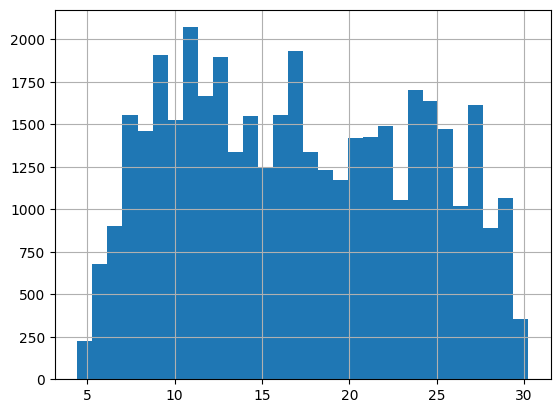

In [ ]:
df["netWeight"].hist(bins=30)

##### Test

In [ ]:
Test['netWeight'] = Test['netWeight'].replace(
    r'(?i)^(-1(\.0+)?|-0\.1+|-999(\.0+)?|999|1|tbd|to be determined|nil|missing|data missing|not available|not specified|unknown|amount: nan|\.{3}|###|\?+|--)$',
    np.nan,
    regex=True
)

Test['netWeight'] = Test['netWeight'].replace(
    r'(?i)^(data:|val:|amount:|measure:)\s*',  # case insensitive
    '',
    regex=True
)

Test["netWeight"] = Test["netWeight"].apply(clean_weight)
Test.loc[Test["netWeight"] < 0, "netWeight"] = Test["netWeight"].abs()


## `packageWeight` column ✅

In [ ]:
df['packageWeight'].isna().sum()

np.int64(0)

In [ ]:
# df["packageWeight"].value_counts()

In [ ]:
df['packageWeight'] = df['packageWeight'].replace(
    r'(?i)^(-1(\.0+)?|-0\.1+|-999(\.0+)?|999|1|tbd|to be determined|nil|missing|data missing|not available|not specified|unknown|amount: nan|\.{3}|###|\?+|--)$',
    np.nan,
    regex=True
)

df['packageWeight'] = df['packageWeight'].replace(
    r'(?i)^(data:|val:|amount:|measure:)\s*',  # case insensitive
    '',
    regex=True
)


In [ ]:
# df["packageWeight"].value_counts()

In [ ]:
df['packageWeight'].isna().sum()

np.int64(0)

In [ ]:
#  ال فوق تطبيق الدالة
df["packageWeight"] = df["packageWeight"].apply(clean_weight)
df.loc[df["packageWeight"] < 0, "packageWeight"] = df["packageWeight"].abs()
df["packageWeight"] = df["packageWeight"].astype(float).round(4)
df["packageWeight"] = pd.to_numeric(df["packageWeight"], errors='coerce')

In [ ]:
df["packageWeight"].value_counts()

packageWeight
3    10503
3     6054
4     4770
1     4733
3     4291
2     2286
5     1551
4     1532
1     1231
3      287
3      172
3      151
3      136
3      128
3      122
3       94
3       61
3       56
3       45
3       44
3       40
3       39
3       38
3       37
3       37
3       37
3       37
3       35
3       34
3       34
3       33
3       32
3       31
3       30
3       30
3       28
3       28
3       28
3       28
3       25
3       25
3       25
3       25
3       25
3       24
3       23
3       22
3       21
3       21
3       21
3       20
3       19
3       18
3       18
3       18
3       17
3       17
3       17
3       16
3       16
3       16
3       16
3       15
3       15
3       15
3       15
3       15
3       15
3       15
3       14
3       14
3       14
3       13
3       13
3       13
3       13
3       12
3       12
3       12
3       12
3       11
3       11
3       11
3       11
3       10
3       10
3       10
3       10
3       10
3      

In [ ]:
df['packageWeight'].isna().sum()

np.int64(0)

<Axes: >

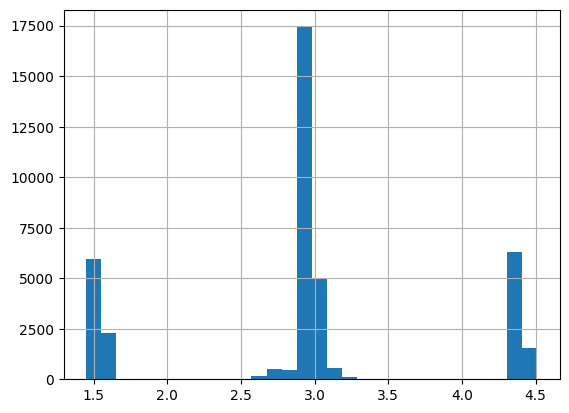

In [ ]:
df['packageWeight'].hist(bins=30)

In [ ]:
df.loc[df['packageWeight'] >200, 'packageWeight'].count()

np.int64(0)

In [ ]:
df.loc[df["packageWeight"] > 50 ,"packageWeight"] = np.nan

<Axes: >

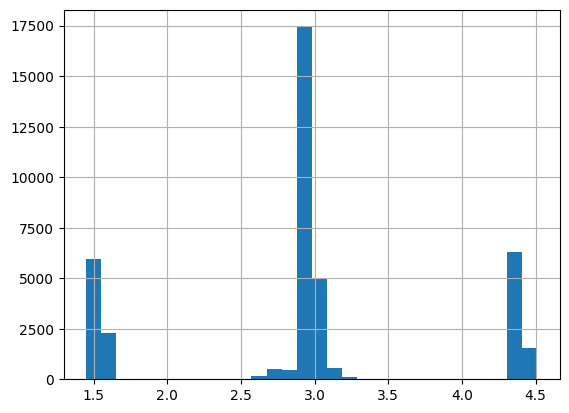

In [ ]:
df['packageWeight'].hist(bins=30)

###### Test

In [ ]:
Test['packageWeight'] = Test['packageWeight'].replace(
    r'(?i)^(-1(\.0+)?|-0\.1+|-999(\.0+)?|999|1|tbd|to be determined|nil|missing|data missing|not available|not specified|unknown|amount: nan|\.{3}|###|\?+|--)$',
    np.nan,
    regex=True
)
Test['packageWeight'] = Test['packageWeight'].replace(
    r'(?i)^(data:|val:|amount:|measure:)\s*',  # case insensitive
    '',
    regex=True
)
#  ال فوق تطبيق الدالة
Test["packageWeight"] = Test["packageWeight"].apply(clean_weight)
Test.loc[df["packageWeight"] < 0, "packageWeight"] = Test["packageWeight"].abs()
Test["packageWeight"] = Test["packageWeight"].astype(float).round(4)
Test["packageWeight"] = pd.to_numeric(df["packageWeight"], errors='coerce')

<Axes: >

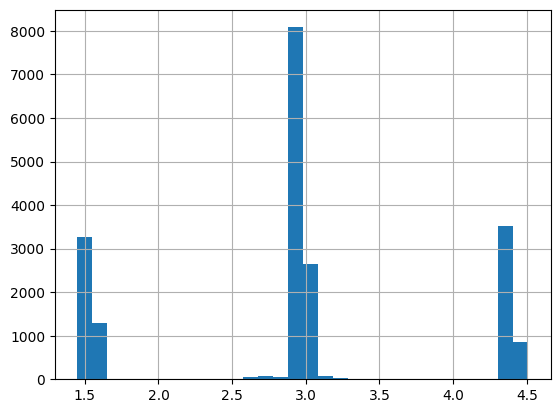

In [ ]:
Test['packageWeight'].hist(bins=30)

## Filling the nan in the 3 columns ✅

In [ ]:
df[["grossWeight", "netWeight", "packageWeight"]].isna().sum()

grossWeight      0
netWeight        0
packageWeight    0
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer
# Create a clean copy
df_clean = df.copy()
weight_columns = ['grossWeight', 'netWeight', 'packageWeight']

print("=== Starting Weight Imputation Pipeline ===")

# Step 1: Fill single missing values using equation
print("1. Filling single missing values with equation...")
nan_mask = df_clean[weight_columns].isnull()
single_nan_mask = nan_mask.sum(axis=1) == 1

# Fill single missing values
df_clean.loc[single_nan_mask & nan_mask['grossWeight'], 'grossWeight'] = (
    df_clean.netWeight + df_clean.packageWeight
)
df_clean.loc[single_nan_mask & nan_mask['netWeight'], 'netWeight'] = (
    df_clean.grossWeight - df_clean.packageWeight
)
df_clean.loc[single_nan_mask & nan_mask['packageWeight'], 'packageWeight'] = (
    df_clean.grossWeight - df_clean.netWeight
)

# Step 2: Fill 2-3 missing values with KNN
print("2. Filling 2-3 missing values with KNN...")
imputer = KNNImputer(n_neighbors=5)
imputed_values = imputer.fit_transform(df_clean[weight_columns])
df_clean[weight_columns] = imputed_values

# Step 3: Final validation
final_nans = df_clean[weight_columns].isnull().sum()
print("\n=== Pipeline Complete ===")
print("Final NaN counts:")
for col in weight_columns:
    print(f"{col}: {final_nans[col]}")

# Update the original train dataframe
df = df_clean

=== Starting Weight Imputation Pipeline ===
1. Filling single missing values with equation...
2. Filling 2-3 missing values with KNN...

=== Pipeline Complete ===
Final NaN counts:
grossWeight: 0
netWeight: 0
packageWeight: 0


## Last Check

In [ ]:
from geopy.distance import geodesic
coord_columns = ['customer_lat', 'customer_lng', 'seller_lat', 'seller_lng']
for i in coord_columns :
    print(f"{i}<-{df[i].isna().sum()}")

def clean_coordinate_columns(df):
    """
    Clean latitude/longitude columns to extract only float numbers using regex
    """
    def extract_float(value):
        if pd.isna(value):
            return np.nan

        value_str = str(value).strip()
        # Use regex to extract the first float number (including negative signs and decimals)
        match = re.search(r'[-+]?\d*\.?\d+', value_str)

        if match:
            try:
                return float(match.group())
            except ValueError:
                return np.nan
        else:
            return np.nan

    # Clean each coordinate column
    for col in coord_columns:
        if col in df.columns:
            print(f"Cleaning {col}...")
            original_non_null = df[col].notna().sum()

            # Apply the cleaning function
            df[col] = df[col].apply(extract_float)

            cleaned_non_null = df[col].notna().sum()
            print(f"  Original non-null: {original_non_null}")
            print(f"  Cleaned non-null: {cleaned_non_null}")
            print(f"  Values lost: {original_non_null - cleaned_non_null}")

    return df
df = clean_coordinate_columns(df)

for i in coord_columns :
    print(f"{i}<-{df[i].isna().sum()}")


customer_lat<-133
customer_lng<-134
seller_lat<-346
seller_lng<-350
Cleaning customer_lat...
  Original non-null: 40248
  Cleaned non-null: 40154
  Values lost: 94
Cleaning customer_lng...
  Original non-null: 40247
  Cleaned non-null: 40161
  Values lost: 86
Cleaning seller_lat...
  Original non-null: 40035
  Cleaned non-null: 39906
  Values lost: 129
Cleaning seller_lng...
  Original non-null: 40031
  Cleaned non-null: 39920
  Values lost: 111
customer_lat<-227
customer_lng<-220
seller_lat<-475
seller_lng<-461


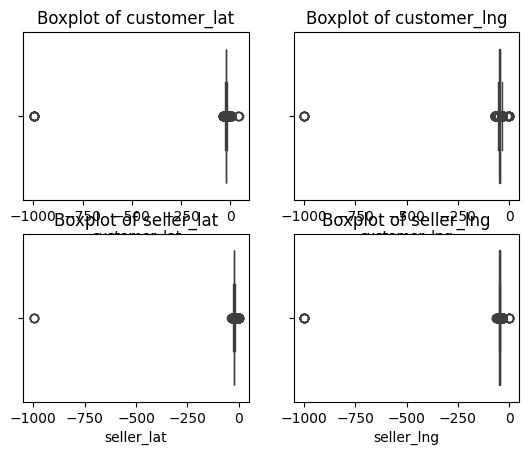

In [ ]:
for idx, col in enumerate(coord_columns, 1):
    plt.subplot(2, 2, idx)  # n rows, 1 column, idx-th plot
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.show()

In [ ]:
def validate_cleaned_coordinates(df):
    """
    Validate that cleaned coordinates are within proper ranges
    """
    print("=== Final Coordinate Validation ===")

    coord_ranges = {
        'customer_lat': (-90, 90),
        'seller_lat': (-90, 90),
        'customer_lng': (-180, 180),
        'seller_lng': (-180, 180)
    }

    for col, (min_val, max_val) in coord_ranges.items():
        if col in df.columns:
            valid_mask = (df[col] >= min_val) & (df[col] <= max_val)
            invalid_count = (~valid_mask & df[col].notna()).sum()

            print(f"{col}:")
            print(f"  Valid values: {valid_mask.sum()}")
            print(f"  Invalid values (out of range): {invalid_count}")
            print(f"  Null values: {df[col].isna().sum()}")

            if invalid_count > 0:
                # Set out-of-range values to NaN
                df.loc[~valid_mask & df[col].notna(), col] = np.nan
                print(f"  → Fixed {invalid_count} out-of-range values")

    return df

# Final validation
df = validate_cleaned_coordinates(df)

# Show final data types and ranges
print("\n=== Final Coordinate Summary ===")
for col in ['customer_lat', 'customer_lng', 'seller_lat', 'seller_lng']:
    if col in df.columns:
        print(f"{col}: dtype={df[col].dtype}, range=[{df[col].min():.2f}, {df[col].max():.2f}]")

=== Final Coordinate Validation ===
customer_lat:
  Valid values: 40142
  Invalid values (out of range): 12
  Null values: 227
  → Fixed 12 out-of-range values
seller_lat:
  Valid values: 39902
  Invalid values (out of range): 4
  Null values: 475
  → Fixed 4 out-of-range values
customer_lng:
  Valid values: 40153
  Invalid values (out of range): 8
  Null values: 220
  → Fixed 8 out-of-range values
seller_lng:
  Valid values: 39910
  Invalid values (out of range): 10
  Null values: 461
  → Fixed 10 out-of-range values

=== Final Coordinate Summary ===
customer_lat: dtype=float64, range=[-36.61, 41.15]
customer_lng: dtype=float64, range=[-68.51, -1.00]
seller_lat: dtype=float64, range=[-36.61, -1.00]
seller_lng: dtype=float64, range=[-64.28, -1.00]


In [ ]:
def clean_coordinate_columns(Test):
    """
    Clean latitude/longitude columns to extract only float numbers using regex
    """
    coord_columns = ['customer_lat', 'customer_lng', 'seller_lat', 'seller_lng']

    def extract_float(value):
        if pd.isna(value):
            return np.nan

        # Convert to string and clean
        value_str = str(value).strip()

        # Use regex to extract the first float number (including negative signs and decimals)
        match = re.search(r'[-+]?\d*\.?\d+', value_str)

        if match:
            try:
                return float(match.group())
            except ValueError:
                return np.nan
        else:
            return np.nan

    # Clean each coordinate column
    for col in coord_columns:
        if col in Test.columns:
            print(f"Cleaning {col}...")
            original_non_null = Test[col].notna().sum()

            # Apply the cleaning function
            Test[col] = Test[col].apply(extract_float)

            cleaned_non_null = Test[col].notna().sum()
            print(f"  Original non-null: {original_non_null}")
            print(f"  Cleaned non-null: {cleaned_non_null}")
            print(f"  Values lost: {original_non_null - cleaned_non_null}")

    return Test

In [ ]:
def convert_to_float_and_verify(Test):
    """
    Convert the 4 coordinate columns to float and verify the data types
    """
    coord_columns = ['customer_lat', 'customer_lng', 'seller_lat', 'seller_lng']

    print("=== Converting coordinates to float ===")

    # Convert each column to float
    for col in coord_columns:
        if col in Test.columns:
            print(f"Converting {col}...")
            original_dtype = Test[col].dtype
            Test[col] = pd.to_numeric(Test[col], errors='coerce')
            new_dtype = Test[col].dtype
            print(f"  {original_dtype} → {new_dtype}")

    return Test

Test=convert_to_float_and_verify(Test)

=== Converting coordinates to float ===
Converting customer_lat...
  object → float64
Converting customer_lng...
  object → float64
Converting seller_lat...
  object → float64
Converting seller_lng...
  object → float64


In [ ]:
from sklearn.impute import KNNImputer

def fill_coordinate_nans_with_knn(df):
    """
    Fill NaN values in coordinate columns using KNN imputation
    """
    coord_columns = ['customer_lat', 'customer_lng', 'seller_lat', 'seller_lng']

    # Check which coordinate columns exist in the dataframe
    available_coords = [col for col in coord_columns if col in df.columns]

    if not available_coords:
        print("No coordinate columns found in the dataframe")
        return df

    print("=== Before KNN Imputation ===")
    for col in available_coords:
        print(f"{col}: {df[col].isnull().sum()} NaN values")

    total_nans_before = df[available_coords].isnull().sum().sum()
    print(f"Total NaN values: {total_nans_before}")

    if total_nans_before == 0:
        print("No NaN values found in coordinate columns")
        return df

    # Use KNN imputer
    imputer = KNNImputer(n_neighbors=5)
    imputed_values = imputer.fit_transform(df[available_coords])

    # Update the dataframe with imputed values
    for i, col in enumerate(available_coords):
        df[col] = imputed_values[:, i]

    print("\n=== After KNN Imputation ===")
    for col in available_coords:
        print(f"{col}: {df[col].isnull().sum()} NaN values")

    total_nans_after = df[available_coords].isnull().sum().sum()
    print(f"Total NaN values: {total_nans_after}")
    print(f"Values filled: {total_nans_before - total_nans_after}")

    return df

# Apply KNN imputation
df = fill_coordinate_nans_with_knn(df)

=== Before KNN Imputation ===
customer_lat: 239 NaN values
customer_lng: 228 NaN values
seller_lat: 479 NaN values
seller_lng: 471 NaN values
Total NaN values: 1417

=== After KNN Imputation ===
customer_lat: 0 NaN values
customer_lng: 0 NaN values
seller_lat: 0 NaN values
seller_lng: 0 NaN values
Total NaN values: 0
Values filled: 1417


In [ ]:
for i in coord_columns :
    print(f"{i}<-{df[i].isna().sum()}")

customer_lat<-0
customer_lng<-0
seller_lat<-0
seller_lng<-0


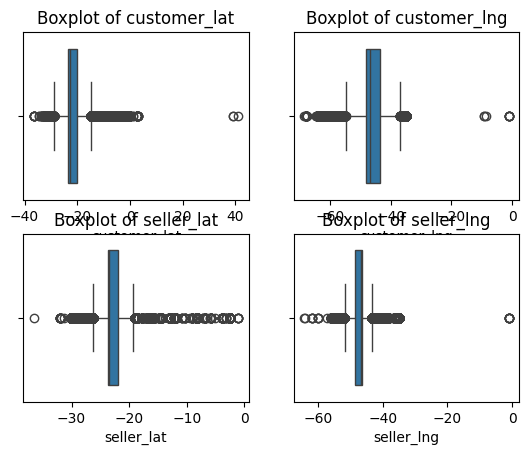

In [ ]:
for idx, col in enumerate(coord_columns, 1):
    plt.subplot(2, 2, idx)  # n rows, 1 column, idx-th plot
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.show()

In [ ]:
def calculate_distance(row):
    """
    Calculate distance between customer and seller in kilometers
    using geodesic distance (most accurate for Earth's curvature)
    """
    customer_coords = (row['customer_lat'], row['customer_lng'])
    seller_coords = (row['seller_lat'], row['seller_lng'])

    try:
        return geodesic(customer_coords, seller_coords).km
    except:
        return np.nan

# Apply to your dataframe
df['distance_km'] = df.apply(calculate_distance, axis=1)
# Test['distance_km'] = df.apply(calculate_distance, axis=1)

In [ ]:
def create_business_distance_categories(df, distance_col='distance_km'):
    """
    Create distance categories based on business logic and delivery constraints
    """
    # Business-oriented categories
    bins = [0, 3, 10, 30, 100, 300, 1000, float('inf')]
    labels = [
        'Walkable Delivery (0-3km)',
        'Quick Delivery (3-10km)',
        'Same Day City (10-30km)',
        'Next Day Regional (30-100km)',
        '2-Day Statewide (100-300km)',
        '3-5 Day National (300-1000km)',
        'International Shipping (1000+km)'
    ]

    df['delivery_category'] = pd.cut(df[distance_col], bins=bins, labels=labels, right=False)

    # # Additional business features

    # df['requires_long_distance_shipping'] = (df[distance_col] > 100).astype(int)
    # df['eligible_for_same_day'] = (df[distance_col] <= 30).astype(int)
    # df['free_shipping_threshold'] = (df[distance_col] <= 50).astype(int)

    return df

# Apply business categorization
df = create_business_distance_categories(df, distance_col='distance_km')


In [ ]:
def add_distance_columns_to_test(df, Test):
    """
    Add only distance_km and delivery_category columns from df to Test DataFrame
    """
    # Only these two columns
    distance_columns = ['distance_km', 'delivery_category']

    print("=== Adding distance columns to Test DataFrame ===")

    for col in distance_columns:
        if col in df.columns:
            if col in Test.columns:
                print(f"⚠️  {col} already exists in Test, skipping...")
            else:
                Test[col] = df[col]
                print(f"✅ Added {col} to Test")
        else:
            print(f"❌ {col} not found in df")

    return Test
Test=add_distance_columns_to_test(df, Test)

=== Adding distance columns to Test DataFrame ===
✅ Added distance_km to Test
✅ Added delivery_category to Test


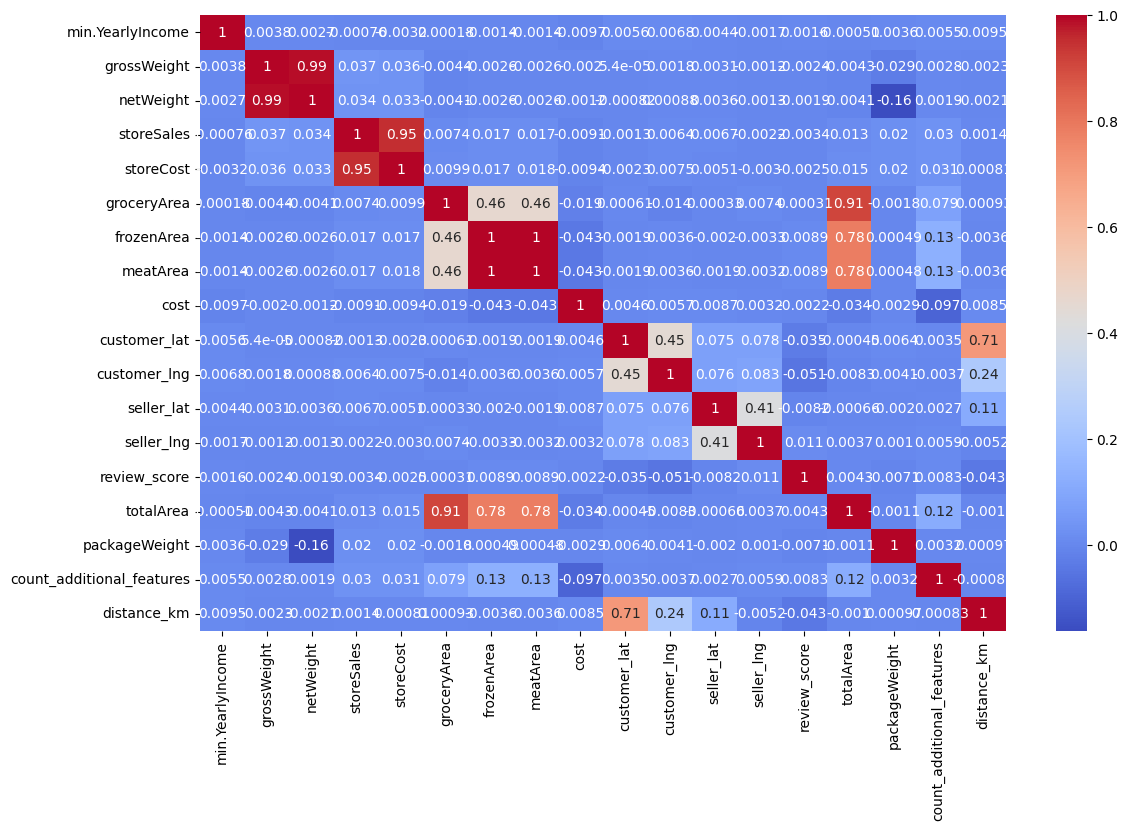

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
cor = df[numeric_cols].corr()

# plot heatmap
plt.figure(figsize=(13,8))
sns.heatmap(cor, annot=True, cmap="coolwarm")
plt.show()

In [ ]:
df.drop(columns=['customer_lat', 'customer_lng', 'seller_lat', 'seller_lng','min.YearlyIncome'], inplace=True)

In [ ]:
Test.drop(columns=['customer_lat', 'customer_lng', 'seller_lat', 'seller_lng',"min.YearlyIncome"], inplace=True)

In [ ]:
for col in Test.columns:
    if col in df.columns:
        if Test[col].dtype == df[col].dtype:
            print(f"✅ Column '{col}' has the SAME dtype: {df[col].dtype}")
        else:
            print(f"❌ Column '{col}' has DIFFERENT dtype: Test={Test[col].dtype}, df={df[col].dtype}")
    else:
        print(f"⚠️ Column '{col}' not found in df")


⚠️ Column 'ID' not found in df
✅ Column 'storeKind' has the SAME dtype: object
✅ Column 'storeSales' has the SAME dtype: float64
✅ Column 'storeCost' has the SAME dtype: float64
✅ Column 'grossWeight' has the SAME dtype: float64
✅ Column 'netWeight' has the SAME dtype: float64
✅ Column 'packageWeight' has the SAME dtype: float64
✅ Column 'isRecyclable?' has the SAME dtype: object
✅ Column 'totalArea' has the SAME dtype: float64
✅ Column 'groceryArea' has the SAME dtype: float64
✅ Column 'frozenArea' has the SAME dtype: float64
✅ Column 'meatArea' has the SAME dtype: float64
✅ Column 'customer_state' has the SAME dtype: object
✅ Column 'seller_state' has the SAME dtype: object
✅ Column 'review_score' has the SAME dtype: float64
✅ Column 'product' has the SAME dtype: object
✅ Column 'product_simplified' has the SAME dtype: object
✅ Column 'brand' has the SAME dtype: object
✅ Column 'product_brand' has the SAME dtype: object
✅ Column 'count_additional_features' has the SAME dtype: float64

In [ ]:
df.columns

Index(['grossWeight', 'netWeight', 'isRecyclable?', 'storeKind', 'storeSales',
       'storeCost', 'groceryArea', 'frozenArea', 'meatArea', 'cost',
       'customer_state', 'seller_state', 'review_score', 'totalArea',
       'packageWeight', 'product', 'product_simplified', 'brand',
       'product_brand', 'count_additional_features', 'marital_status',
       'gender', 'promoCategory', 'distance_km', 'delivery_category'],
      dtype='object')

In [ ]:
Test.columns

Index(['ID', 'storeKind', 'storeSales', 'storeCost', 'grossWeight',
       'netWeight', 'packageWeight', 'isRecyclable?', 'totalArea',
       'groceryArea', 'frozenArea', 'meatArea', 'customer_state',
       'seller_state', 'review_score', 'product', 'product_simplified',
       'brand', 'product_brand', 'count_additional_features', 'marital_status',
       'gender', 'promoCategory', 'distance_km', 'delivery_category'],
      dtype='object')

In [ ]:
assert len(Test.columns) == len(df.columns)

In [ ]:
Test.isna().sum()

ID                              0
storeKind                     104
storeSales                    269
storeCost                     390
grossWeight                  1325
netWeight                    1392
packageWeight                   0
isRecyclable?                  54
totalArea                    1047
groceryArea                  1100
frozenArea                   1029
meatArea                     1039
customer_state                277
seller_state                  273
review_score                  203
product                        63
product_simplified             63
brand                           0
product_brand                  63
count_additional_features      49
marital_status                 59
gender                         59
promoCategory                  34
distance_km                     0
delivery_category               0
dtype: int64

In [ ]:
df.to_csv("cleaned_train_version_2.csv",
          index=False,
          encoding='utf-8',
          na_rep='NA',
          float_format='%.6f')

In [ ]:
Test.to_csv("cleaned_Test_version2.csv",
          index=False,
          encoding='utf-8',
          na_rep='NA',
          float_format='%.6f')